In [96]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Model

In [83]:
np.random.seed(0)

In [84]:
[X_train, y_train], [X_test, y_test] = mnist.load_data()
assert(X_train.shape[0]==y_train.shape[0], "number of train images not equal to train labels")
assert(X_test.shape[0]==y_test.shape[0], "number of test images not equal to test labels")
assert(X_train.shape[1:] == (28,28), "Images are not 28*28")


<>:2: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:2: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-84-88d480b69a33>:2: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_train.shape[0]==y_train.shape[0], "number of train images not equal to train labels")
<ipython-input-84-88d480b69a33>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_test.shape[0]==y_test.shape[0], "number of test images not equal to test labels")
<ipython-input-84-88d480b69a33>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_train.shape[1:] == (28,28), "Images a

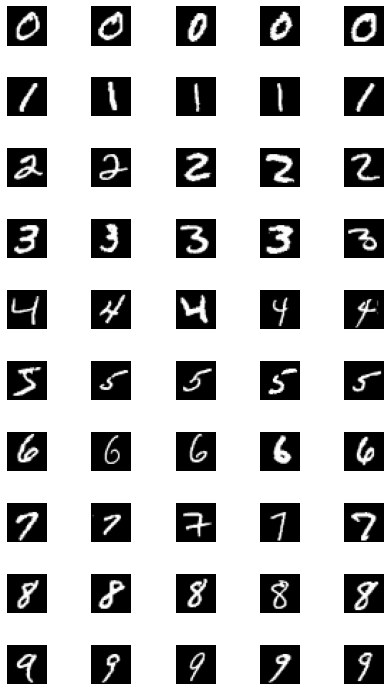

In [85]:
n_samples = []
cols = 5
n_classes = 10 
fig, axs = plt.subplots(nrows=n_classes, ncols=cols, figsize=(6,10))
fig.tight_layout()
for i in range(n_classes):
    x_selected = X_train[y_train==i][0:cols]
    for j in range(cols):
        axs[i][j].imshow(x_selected[j], cmap= plt.get_cmap("gray"))
        axs[i][j].axis("off")

In [86]:
y_train = to_categorical(y_train, 10) #one-hot encoding
y_test = to_categorical(y_test, 10)

X_train = X_train/255 #normalisation
X_test = X_test/255

n_pixels = 784
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [87]:
def leNet():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
    return model
model = leNet()

In [88]:
h = model.fit(X_train, y_train, verbose=1, validation_split=0.1, epochs=10, batch_size=200, shuffle='true')

Epoch 1/10
270/270 [==============================] - 17s 63ms/step - loss: 0.1818 - accuracy: 0.9422 - val_loss: 0.0555 - val_accuracy: 0.9850
Epoch 2/10
270/270 [==============================] - 16s 59ms/step - loss: 0.0759 - accuracy: 0.9768 - val_loss: 0.0453 - val_accuracy: 0.9858
Epoch 3/10
270/270 [==============================] - 17s 63ms/step - loss: 0.0692 - accuracy: 0.9799 - val_loss: 0.0417 - val_accuracy: 0.9858
Epoch 4/10
270/270 [==============================] - 17s 65ms/step - loss: 0.0648 - accuracy: 0.9816 - val_loss: 0.0518 - val_accuracy: 0.9840
Epoch 5/10
270/270 [==============================] - 16s 60ms/step - loss: 0.0634 - accuracy: 0.9815 - val_loss: 0.0519 - val_accuracy: 0.9863
Epoch 6/10
270/270 [==============================] - 18s 66ms/step - loss: 0.0632 - accuracy: 0.9820 - val_loss: 0.0428 - val_accuracy: 0.9883
Epoch 7/10
270/270 [==============================] - 18s 66ms/step - loss: 0.0606 - accuracy: 0.9832 - val_loss: 0.0627 - val_accuracy:

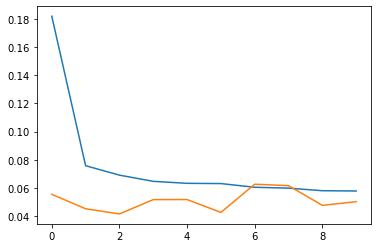

In [89]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

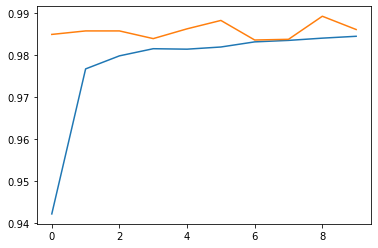

In [90]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

In [91]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0526 - accuracy: 0.9848


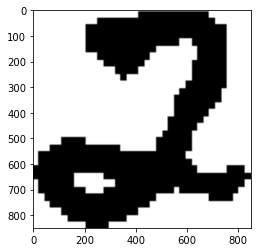

In [92]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [93]:
import cv2
img_array = np.asarray(img)
resized= cv2.resize(img_array, (28,28))
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray)
image = image/255 #normalization
image = image.reshape(1, 28, 28, 1)

In [94]:
pred = model.predict_classes(image)
print(pred)

[2]


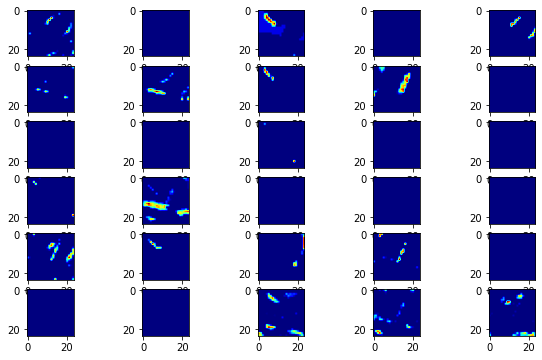

In [122]:
layer1 = Model(inputs = model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs=model.layers[2].output)
visual1 = layer1.predict(image)
visual2 = layer2.predict(image)
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.imshow(visual1[0,:,:, i], cmap=plt.get_cmap('jet'))